In [49]:
import sys
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,log_loss , confusion_matrix
from sklearn import metrics

In [7]:
sys.executable

'c:\\Users\\Gyanprakash\\AppData\\Local\\Programs\\Python\\Python311\\python.exe'

>## Create functions for all the steps involved in complete model training lifecycle

In [8]:
import pandas as pd
import numpy as np

In [9]:
def load_data(path):
    data = pd.read_csv(path)
    return data

In [10]:
print(os.getcwd())
os.chdir('d:\\vscode_machineLearning\\MLOps')

d:\vscode_machineLearning\MLOps\mlflow\notebook


In [11]:
df = load_data(r'data/banking.csv')

In [12]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


In [13]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [14]:
df.isnull().sum().sum()

0

In [15]:
df[df['education'] =='basic.9y']

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
7,39,blue-collar,divorced,basic.9y,no,yes,no,cellular,may,fri,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
18,28,blue-collar,married,basic.9y,unknown,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
19,26,unemployed,single,basic.9y,no,yes,yes,cellular,jul,mon,...,4,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,0
20,41,unemployed,married,basic.9y,unknown,yes,no,telephone,apr,fri,...,1,999,1,failure,-1.8,93.075,-47.1,1.405,5099.1,0
34,32,services,divorced,basic.9y,unknown,no,no,cellular,jul,wed,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41168,29,blue-collar,single,basic.9y,unknown,yes,no,cellular,jul,tue,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0
41169,46,technician,married,basic.9y,no,no,no,cellular,nov,tue,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,0
41172,27,blue-collar,single,basic.9y,unknown,yes,no,cellular,jul,wed,...,4,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,1
41176,30,blue-collar,single,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.250,5099.1,0


In [16]:
def preprocessing(data):
    data = data.dropna()
    data['education']=np.where(data['education'] =='basic.9y', 'Basic', data['education'])
    data['education']=np.where(data['education'] =='basic.6y', 'Basic', data['education'])
    data['education']=np.where(data['education'] =='basic.4y', 'Basic', data['education'])
    
    cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
    for var in cat_vars:
        cat_list='var'+'_'+var
        cat_list = pd.get_dummies(data[var], prefix=var)
        data1=data.join(cat_list)
        data=data1

    cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
    data_vars=data.columns.values.tolist()
    to_keep=[i for i in data_vars if i not in cat_vars]
    
    final_data=data[to_keep]
    
    
    final_data.columns = final_data.columns.str.replace('.','_')
    final_data.columns = final_data.columns.str.replace(' ','_')
    return final_data

In [17]:
df = preprocessing(df)

In [20]:
os.getcwd()

'd:\\vscode_machineLearning\\MLOps'

In [23]:
df.to_csv(path_or_buf='data/banking_cleaned_data.csv',index=False)

In [25]:
def train_test_split(final_data):
    X = final_data.loc[:, final_data.columns != 'y']
    y = final_data.loc[:, final_data.columns == 'y']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify = y, random_state=47)
    return X_train, X_test, y_train, y_test

In [27]:
X_train, X_test, y_train, y_test = train_test_split(df)

In [33]:
def training_basic_classifier(X_train,y_train):
    model = RandomForestClassifier(n_estimators=101)
    model.fit(X_train, y_train)
    return model

In [34]:
model = training_basic_classifier(X_train,y_train)

C:\Users\Gyanprakash\AppData\Local\Temp\ipykernel_9328\583477909.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


In [35]:
model

RandomForestClassifier(n_estimators=101)

In [36]:
def predict_on_test_data(model,X_test):
    y_pred = model.predict(X_test)
    return y_pred

In [37]:
def predict_prob_on_test_data(model,X_test):
    y_pred = model.predict_proba(X_test)
    return y_pred

In [38]:
y_pred = predict_on_test_data(model,X_test)

In [41]:
y_pred_prob = predict_prob_on_test_data(model,X_test) #model.predict_proba(X_test)

In [42]:
y_pred_prob

array([[0.99009901, 0.00990099],
       [1.        , 0.        ],
       [0.98019802, 0.01980198],
       ...,
       [1.        , 0.        ],
       [0.85148515, 0.14851485],
       [0.99009901, 0.00990099]])

## metrics

In [45]:
def get_metrics(y_true, y_pred, y_pred_prob):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    entropy = log_loss(y_true, y_pred_prob)
    return {'accuracy': round(acc, 2), 'precision': round(prec, 2), 'recall': round(recall, 2), 'entropy': round(entropy, 2)}

In [46]:
get_metrics(y_test,y_pred,y_pred_prob)

{'accuracy': 0.91, 'precision': 0.66, 'recall': 0.44, 'entropy': 0.21}

In [47]:
def create_roc_auc_plot(clf, X_test, y_test):
    y_pred_prob = clf.predict_proba(X_test)[:, 1]  # Get predicted probabilities of the positive class
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
    
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve')
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='best')
    # plt.savefig('roc_auc_curve.png')
    plt.show()


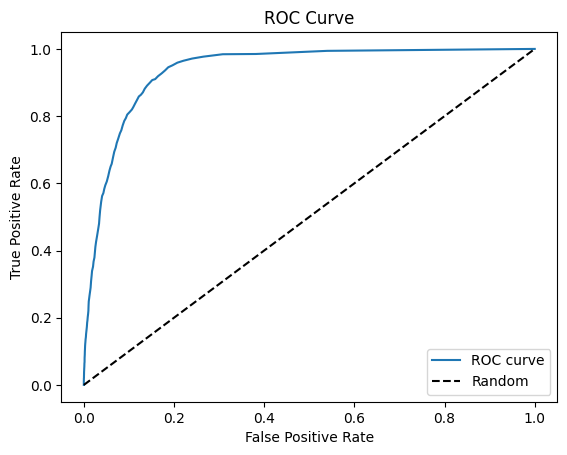

In [48]:
create_roc_auc_plot(model,X_test,y_test)

In [51]:
import seaborn as sns

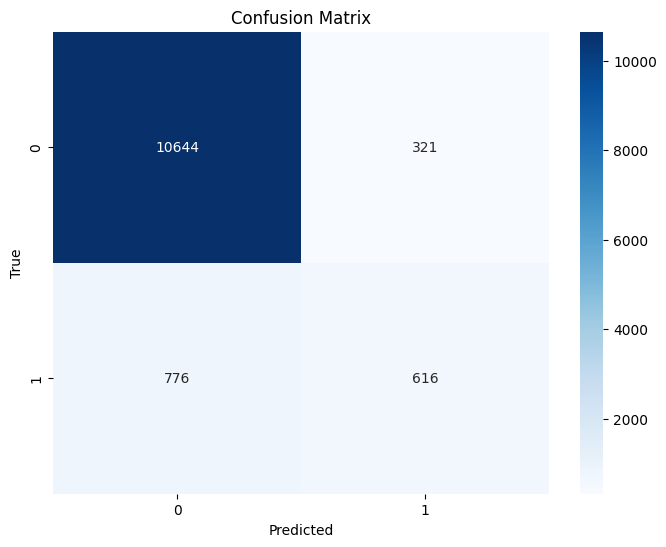

In [52]:
def create_confusion_matrix_plot(clf, X_test, y_test):
    # Get predicted labels
    y_pred = clf.predict(X_test)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
      
    # Create a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    # plt.savefig('confusion_matrix.png')
    plt.show()

create_confusion_matrix_plot(model, X_test, y_test)

# ML Flow

In [69]:
experiment_name = "basic_classifier-another-day" ##basic classifier
run_name="another-term_deposit" 

### Function to create an experiment in MLFlow and log parameters, metrics and artifacts files like images etc.

In [70]:
import mlflow
mlflow.set_experiment(experiment_name)

2023/08/23 11:57:02 INFO mlflow.tracking.fluent: Experiment with name 'basic_classifier-another-day' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///d:/vscode_machineLearning/MLOps/mlruns/878341868913775799', creation_time=1692772022181, experiment_id='878341868913775799', last_update_time=1692772022181, lifecycle_stage='active', name='basic_classifier-another-day', tags={}>

In [71]:
def create_experiment(run_name, run_metrics,model, confusion_matrix_path = None, 
                      roc_auc_plot_path = None, run_params=None):
    
    with mlflow.start_run():
        
        if not run_params == None:
            for param in run_params:
                mlflow.log_param(param, run_params[param])
            
        for metric in run_metrics:
            mlflow.log_metric(metric, run_metrics[metric])
        
        mlflow.sklearn.log_model(model, "model")
        
        if not confusion_matrix_path == None:
            mlflow.log_artifact(confusion_matrix_path, 'confusion_materix')
            
        if not roc_auc_plot_path == None:
            mlflow.log_artifact(roc_auc_plot_path, "roc_auc_plot")
        
        mlflow.set_tag("tag1", "Random Forest")
        mlflow.set_tags({"tag2":"Randomized Search CV", "tag3":"Production"})
            
    print('Run - %s is logged to Experiment - %s' %(run_name, experiment_name))

In [72]:
metrics = get_metrics(y_test,y_pred,y_pred_prob)

In [73]:
# metrics
for i in metrics:
    print(i , metrics[i])

accuracy 0.91
precision 0.66
recall 0.44
entropy 0.21


In [75]:
create_experiment(run_metrics=metrics,run_name='another-term_deposit',model=model,confusion_matrix_path='artifacts/confusion_matrix.png', roc_auc_plot_path='artifacts/roc_auc_curve.png')

Run - another-term_deposit is logged to Experiment - basic_classifier-another-day
